In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(2017)   # ÈöèÊú∫Êï∞ÁßçÂ≠ê

## ÂØºÂÖ•Êï∞ÊçÆ

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

- Êàë‰ª¨Êù•ÁúãÁúãÊï∞ÊçÆÂÖ∑‰ΩìÁöÑÂõæÂÉè

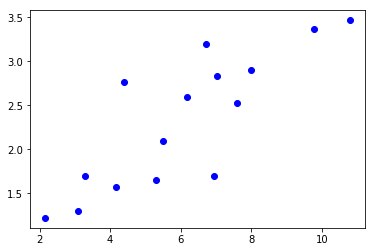

In [3]:
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

- ÁÑ∂Âêé, ÊääÊï∞ÊçÆËΩ¨Êç¢Êàê`tensorflow`ÁöÑ`tensor`ÂΩ¢Âºè

In [4]:
x = tf.constant(x_train, name='x')
y = tf.constant(y_train, name='y')

## ÂÆö‰πâ‰∏Ä‰∏™Á∫øÊÄßÊ®°Âûã
- ÂÆö‰πâÊ®°ÂûãÁöÑ`w`‰ª•Âèä`b`ÂèÇÊï∞
- Áî®`w, b`ÂÆö‰πâËøô‰∏™Á∫øÊÄßÊ®°Âûã

In [5]:
w = tf.Variable(initial_value=tf.random_normal(shape=(1,1)), dtype=tf.float32, name='weight')
b = tf.Variable(initial_value=0, dtype=tf.float32, name='biase')

with tf.variable_scope('Linear_Model'):
    y_pred = w * x + b

Instructions for updating:
Colocations handled automatically by placer.


Ê≥®ÊÑè`tf.variable_scope()`Ëøô‰∏™ÂáΩÊï∞, ÂÆÉÊòØÁî®Êù•ËßÑÂÆö‰∏Ä‰∏™ÂèòÈáèÁöÑ`Âå∫Âüü`ÁöÑ, Âú®Ëøô‰∏™`with`ËØ≠Âè•‰∏ãÂÆö‰πâÁöÑÊâÄÊúâÂèòÈáèÈÉΩÂú®Âêå‰∏Ä‰∏™`ÂèòÈáèÂüü`ÂΩì‰∏≠, `ÂüüÂêç`Â∞±ÊòØ`variable_scope()`ÁöÑÂèÇÊï∞. 

ÈÇ£‰πàÂÆÉÊúâ‰ªÄ‰πàÁî®Âë¢?

ÂÆûÈôÖ‰∏ä, ÊâÄÊúâÂèòÈáèÂüü‰∏≠ÁöÑÂèòÈáèÁöÑÂêçÂ≠óÈÉΩ‰ª•ÂüüÂêç‰∏∫ÂâçÁºÄ:

In [6]:
print(w.name)
print(y_pred.name)

weight:0
Linear_Model/add:0


In [7]:
# ÂºÄÂêØ‰∫§‰∫íÂºè‰ºöËØù
sess = tf.InteractiveSession()

# ‰∏ÄÂÆöË¶ÅÊúâÂàùÂßãÂåñËøô‰∏ÄÊ≠•!!!
sess.run(tf.global_variables_initializer())

Â•Ω‰∫Ü, Áé∞Âú®Êàë‰ª¨ÂèØ‰ª•Áúã‰∏Ä‰∏ãËøô‰∏™Á∫øÊÄßÊ®°ÂûãÁöÑËæìÂá∫ÂÖ∑‰ΩìÈïø‰ªÄ‰πàÊ†∑‰∫Ü

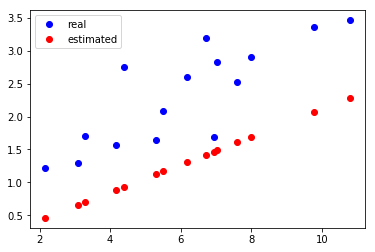

In [8]:
%matplotlib inline

# Ë¶ÅÂÖàÂ∞Ü`tensor`ÁöÑÂÜÖÂÆπ`fetch`Âá∫Êù•
y_pred_numpy = y_pred.eval()

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

## ‰ºòÂåñÊ®°Âûã

- ÂÆö‰πâËØØÂ∑ÆÂáΩÊï∞

ÂâçÈù¢ÊèêÂà∞Ëøá, ‰∏∫‰∫Ü‰ºòÂåñÊàë‰ª¨ÁöÑÊ®°Âûã, ÈúÄË¶ÅÊûÑÂª∫‰∏Ä‰∏™ËØØÂ∑Æ(`loss`)ÂáΩÊï∞, Êù•ÂëäËØâÊàë‰ª¨‰ºòÂåñÁöÑÂ•ΩÂùèÁ®ãÂ∫¶.

ËÄåËøôÈáå, Êàë‰ª¨ÊÉ≥Ë¶ÅÈ¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÂ∞ΩÂèØËÉΩÊé•Ëøë, Âõ†Ê≠§, Êàë‰ª¨Â∞±Áî®‰∏äÈù¢ÂÆö‰πâÁöÑ`loss`ËøõË°åË°°Èáè.

In [9]:
loss = tf.reduce_mean(tf.square(y - y_pred))

# ÁúãÁúãÂú®ÂΩìÂâçÊ®°Âûã‰∏ãÁöÑËØØÂ∑ÆÊúâÂ§öÂ∞ë
print(loss.eval())

1.2624278


- Áé∞Âú®Êàë‰ª¨Áî®Ê¢ØÂ∫¶‰∏ãÈôçÊ≥ïÂéª‰ºòÂåñËøô‰∏™Ê®°Âûã

È¶ñÂÖàÊàë‰ª¨ÈúÄË¶ÅÊ±ÇËß£ËØØÂ∑ÆÂáΩÊï∞ÂØπ‰∫éÊØè‰∏™ÂèÇÊï∞ÁöÑÊ¢ØÂ∫¶. ÈÄöËøáÊ±ÇÂØºÁü•ËØÜÂèØ‰ª•Áü•ÈÅìÊòØ‰∏ãÈù¢ÁöÑÂΩ¢Âºè:

$$
\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

‰ΩÜÂÆûÈôÖ‰∏äÊàë‰ª¨Âπ∂‰∏ç‰ºöËøô‰πàÂéªÁî®, Âõ†‰∏∫`tensorflow`Êã•ÊúâËá™Âä®Ê±ÇÂØºÂäüËÉΩ, ÁúÅÂéª‰∫ÜËøô‰∫õÊï∞Â≠¶Áü•ËØÜ‰ª•ÂèäÊâãÂ∑•Ê±ÇÂØºÁöÑÂ§çÊùÇÂ∑•‰Ωú. ÂèØ‰ª•ÈÄöËøá‰∏ãÈù¢ÁöÑ‰ª£Á†ÅÂéªËé∑Âæó‰∏Ä‰∏™Ê†áÈáèÂØπÂèÇÊï∞ÁöÑÂØºÂáΩÊï∞

In [10]:
w_grad, b_grad = tf.gradients(loss, [w, b])

print('w_grad: %.4f' % w_grad.eval())
print('b_grad: %.4f' % b_grad.eval())

w_grad: -13.1429
b_grad: -2.0791


ÂØπÊ¢ØÂ∫¶‰πò‰∏ä‰∏Ä‰∏™`Ê≠•Èïø(lr)`Êù•Êõ¥Êñ∞ÂèÇÊï∞.‰∏ÄËà¨Êàë‰ª¨ÊääËøô‰∏™Ê≠•ÈïøÁß∞‰∏∫Â≠¶‰π†Áéá

In [11]:
lr = 1e-2

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

sess.run([w_update, b_update])

[array([[0.34328926]], dtype=float32), 0.02079099]

Âú®Êõ¥Êñ∞ÂèÇÊï∞ÂÆåÊàêÂêé, Êàë‰ª¨ÂÜç‰∏ÄÊ¨°ÁúãÁúãÊ®°ÂûãÁöÑËæìÂá∫ÁªìÊûú

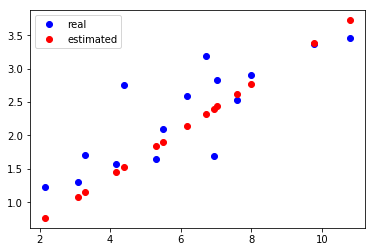

In [12]:
%matplotlib inline

y_pred_numpy = y_pred.eval(session=sess)

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

Êõ¥Êñ∞‰∏ÄÊ¨°‰πãÂêé, Êàë‰ª¨ÂèëÁé∞Á∫¢Ëâ≤ÁÇπË∑ëÂà∞‰∫ÜËìùËâ≤ÁÇπÈôÑËøë, Áõ∏ÊØî‰πãÂâçÈù†ÂæóÊõ¥Ëøë‰∫Ü, ËØ¥ÊòéÈÄöËøáÊ¢ØÂ∫¶‰∏ãÈôçÊ®°ÂûãÂæóÂà∞‰∫Ü‰ºòÂåñ. ÂΩìÁÑ∂Êàë‰ª¨ÂèØ‰ª•Â§öÊõ¥Êñ∞Âá†Ê¨°

<IPython.core.display.Javascript object>


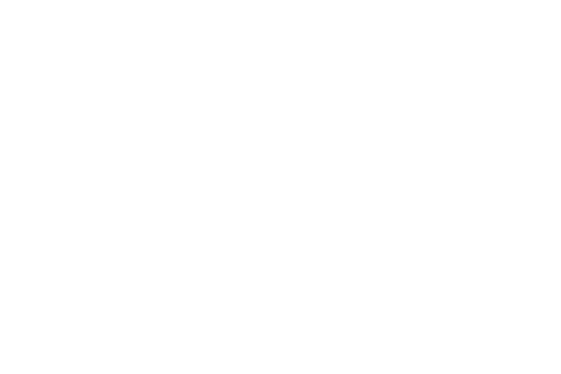

epoch: 0, loss: 0.3626185655593872
epoch: 1, loss: 0.2540731132030487
epoch: 2, loss: 0.25164592266082764
epoch: 3, loss: 0.2511846721172333
epoch: 4, loss: 0.2507619559764862
epoch: 5, loss: 0.25034210085868835
epoch: 6, loss: 0.2499244064092636
epoch: 7, loss: 0.249508798122406
epoch: 8, loss: 0.2490953952074051
epoch: 9, loss: 0.2486840933561325


<IPython.core.display.Javascript object>


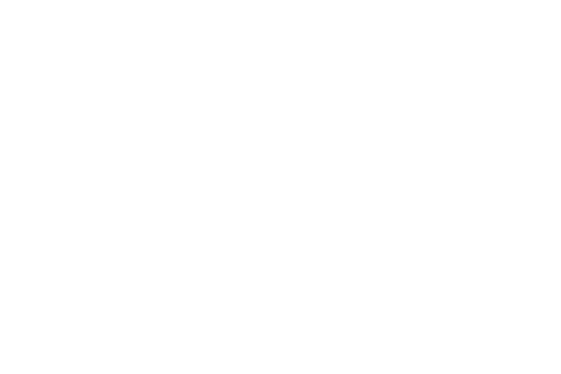

In [13]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()           # ÊâìÂºÄ‰∫§‰∫íÊ®°Âºè

fig.show()
fig.canvas.draw()         # Êõ¥Êñ∞ÊòæÁ§∫

sess.run(tf.global_variables_initializer())

for e in range(10):
    sess.run([w_update, b_update])
    
    y_pred_numpy = y_pred.eval()
    loss_numpy = loss.eval()
    
    ax.clear()
    ax.plot(x_train, y_train, 'bo', label='real')
    ax.plot(x_train, y_pred_numpy, 'ro', label='estimated')
    ax.legend()
    fig.canvas.draw()
    plt.pause(0.5)
    
    print('epoch: {}, loss: {}'.format(e, loss_numpy))

ÂÜçÊù•ÁúãÁúãÊúÄÂêéÁöÑÊ®°ÂûãÁªìÊûúÂêß

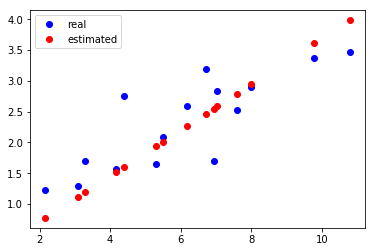

In [14]:
%matplotlib inline

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

In [15]:
sess.close()

ÁªèËøá 10 Ê¨°Êõ¥Êñ∞ÔºåÊàë‰ª¨ÂèëÁé∞Á∫¢Ëâ≤ÁöÑÈ¢ÑÊµãÁªìÊûúÂ∑≤ÁªèÊØîËæÉÂ•ΩÁöÑÊãüÂêà‰∫ÜËìùËâ≤ÁöÑÁúüÂÆûÂÄº„ÄÇ

Áé∞Âú®‰Ω†Â∑≤ÁªèÂ≠¶‰ºö‰∫Ü‰Ω†ÁöÑÁ¨¨‰∏Ä‰∏™Êú∫Âô®Â≠¶‰π†Ê®°Âûã‰∫ÜÔºåÂÜçÊé•ÂÜçÂéâÔºåÂÆåÊàê‰∏ãÈù¢ÁöÑÂ∞èÁªÉ‰π†„ÄÇ

**Â∞èÁªÉ‰π†Ôºö**

ÈáçÂêØ notebook ËøêË°å‰∏äÈù¢ÁöÑÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÔºå‰ΩÜÊòØÊîπÂèòËÆ≠ÁªÉÊ¨°Êï∞‰ª•Âèä‰∏çÂêåÁöÑÂ≠¶‰π†ÁéáËøõË°åÂ∞ùËØïÂæóÂà∞‰∏çÂêåÁöÑÁªìÊûú

### Â§öÈ°πÂºèÂõûÂΩíÔºàÈöèÊú∫ÁîüÊàêÁöÑÂáΩÊï∞Áî®‰∏âÊ¨°ÂáΩÊï∞ÂéªÊãüÂêàÔºâ

In [16]:
# Â∞Ü‰πãÂâçÁöÑ`graph`Ê∏ÖÈô§

tf.reset_default_graph()

In [17]:
# ÂÆö‰πâ‰∏Ä‰∏™Â§öÂèòÈáèÂáΩÊï∞

w_target = np.array([0.5, 3, 2.4]) # ÂÆö‰πâÂèÇÊï∞
b_target = np.array([0.9]) # ÂÆö‰πâÂèÇÊï∞

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # ÊâìÂç∞Âá∫ÂáΩÊï∞ÁöÑÂºèÂ≠ê

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


ÂêåÊ†∑Âú∞, Êàë‰ª¨ÁúãÁúãËøô‰∏™Â§öÈ°πÂºèÁöÑÂõæÂÉè

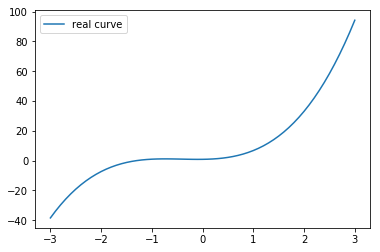

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

# ÁîªÂá∫Ëøô‰∏™ÂáΩÊï∞ÁöÑÊõ≤Á∫ø
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

È¶ñÂÖàÊàë‰ª¨ÊûÑÈÄ†ÂΩ¢Â¶Ç$[x, x^{2}, x^{3}]$ËøôÊ†∑ÁöÑÊï∞ÊçÆ, ÊääÂ§öÈ°πÂºèÂõûÂΩíÈóÆÈ¢òËΩ¨Êç¢‰∏∫Á∫øÊÄßÂõûÂΩíÈóÆÈ¢ò

In [19]:
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1) 
#ÊûÑÈÄ†ÂΩ¢Â¶Ç [ùë•,ùë•2,ùë•3]    np.stack(x, axis=1):ÂèòÊàê3‰∏™Áª¥Â∫¶„ÄÇnp.stack(x, axis=0):ÂèòÊàê2‰∏™Áª¥Â∫¶
x_train = tf.constant(x_train, dtype=tf.float32, name='x_train')
y_train = tf.constant(y_sample, dtype=tf.float32, name='y_train')

ÊûÑÈÄ†Á∫øÊÄßÊ®°Âûã

In [20]:
# ÈöèÊú∫ÁîüÊàêÁöÑÂáΩÊï∞
w = tf.Variable(initial_value=tf.random_normal(shape=(3, 1)), dtype=tf.float32, name='weights')
b = tf.Variable(initial_value=0, dtype=tf.float32, name='bias')

def multi_linear(x):
    return tf.squeeze(tf.matmul(x, w) + b)       # matmul‰πòÊ≥ï


y_ = multi_linear(x_train)


In [21]:
sess = tf.InteractiveSession()

ÁîªÂá∫Ê®°ÂûãËæìÂá∫ÁöÑÁªìÊûúÂíåÁúüÂÆûÁªìÊûúÁöÑÂØπÊØî

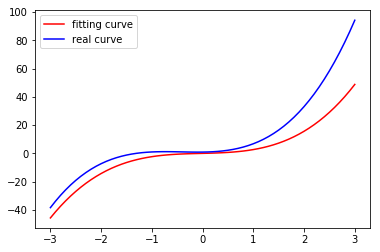

In [22]:
%matplotlib inline

sess.run(tf.global_variables_initializer())

x_train_value = x_train.eval()
y_train_value = y_train.eval()      # Âü∫Á°ÄÂÄº Ôºö‰∏âÊ¨°ÂáΩÊï∞
y_pred_value = y_.eval()           # ÁõÆÊ†áÂÄº

plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()

ÂêåÊ†∑Âú∞, ÂÆö‰πâ`loss`ÂáΩÊï∞

In [23]:
loss = tf.reduce_mean(tf.square(y_train - y_))
loss_numpy = sess.run(loss)
print(loss_numpy)

209.92828


In [24]:
# Âà©Áî®`tf.gradients()`Ëá™Âä®Ê±ÇËß£ÂØºÊï∞
w_grad, b_grad = tf.gradients(loss, [w, b])

print(w_grad.eval())
print(b_grad.eval())

[[ -23.591988]
 [-103.37046 ]
 [-158.93788 ]]
-19.331455


In [25]:
# Âà©Áî®Ê¢ØÂ∫¶‰∏ãÈôçÊõ¥Êñ∞ÂèÇÊï∞
lr = 1e-3

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

Êàë‰ª¨Êù•ÁúãÁúãÊõ¥Êñ∞‰∏ÄÊ¨°‰πãÂêéÁöÑÊïàÊûú

Text(0.5, 1.0, 'loss: 176.2798')

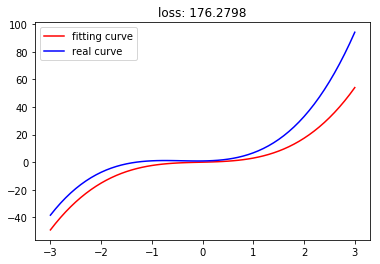

In [26]:
%matplotlib inline

sess.run([w_update, b_update])

x_train_value = x_train.eval(session=sess)
y_train_value = y_train.eval(session=sess)
y_pred_value = y_.eval(session=sess)
loss_numpy = loss.eval(session=sess)

plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()
plt.title('loss: %.4f' % loss_numpy)

ÂèØ‰ª•ÁúãÂà∞, ‰∏ÄÊ¨°Êõ¥Êñ∞ÁöÑÊïàÊûúÂπ∂‰∏çÂ•Ω, ÈÇ£ËÆ©Êàë‰ª¨Â§öÂ∞ùËØïÂá†Ê¨°

<IPython.core.display.Javascript object>


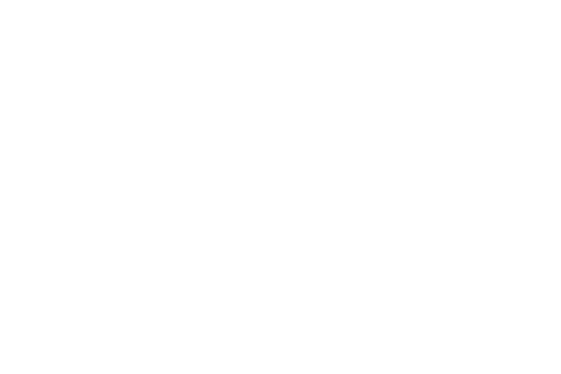

epoch: 20, loss: 13.819317817687988
epoch: 40, loss: 3.3766744136810303
epoch: 60, loss: 0.9350501894950867
epoch: 80, loss: 0.3600548803806305
epoch: 100, loss: 0.22087512910366058


<IPython.core.display.Javascript object>


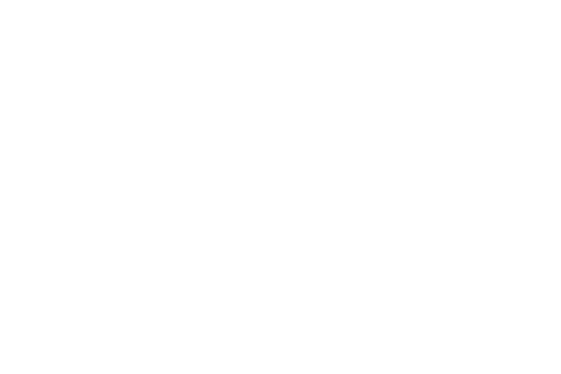

In [27]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(100):  
    sess.run([w_update, b_update])
    
    x_train_value = x_train.eval()
    y_train_value = y_train.eval()
    y_pred_value = y_.eval()
    loss_numpy = loss.eval()

    ax.clear()
    ax.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
    ax.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
    ax.legend()
    
    fig.canvas.draw()
    plt.pause(0.1)
    
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e + 1, loss_numpy))

ÂèØ‰ª•ÁúãÂà∞ÔºåÁªèËøá 100 Ê¨°Êõ¥Êñ∞‰πãÂêéÔºåÂèØ‰ª•ÁúãÂà∞ÊãüÂêàÁöÑÁ∫øÂíåÁúüÂÆûÁöÑÁ∫øÂ∑≤ÁªèÂÆåÂÖ®ÈáçÂêà‰∫Ü

**Â∞èÁªÉ‰π†Ôºö‰∏äÈù¢ÁöÑ‰æãÂ≠êÊòØ‰∏Ä‰∏™‰∏âÊ¨°ÁöÑÂ§öÈ°πÂºèÔºåÂ∞ùËØï‰ΩøÁî®‰∫åÊ¨°ÁöÑÂ§öÈ°πÂºèÂéªÊãüÂêàÂÆÉÔºåÁúãÁúãÊúÄÂêéËÉΩÂÅöÂà∞Â§öÂ•Ω**